# **Task 1:**
**Apply BFS and DFS on trees and graphs**

# **BFS and DFS for Trees:**

In [4]:
from collections import deque

class TreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []

def bfs_tree(root):
    """Breadth First Search (BFS) for a tree."""
    if not root:
        return

    # Create a queue for BFS
    queue = deque([root])
    while queue:
        # Dequeue the node from the queue
        node = queue.popleft()
        # Visit the current node
        print(node.val)
        # Enqueue children of the current node
        for child in node.children:
            queue.append(child)

def dfs_tree(root):
    """Depth First Search (DFS) for a tree."""
    if not root:
        return

    # Create a stack for DFS
    stack = [root]
    while stack:
        # Pop the node from the stack
        node = stack.pop()
        # Visit the current node
        print(node.val)
        # Push children of the current node onto the stack
        stack.extend(reversed(node.children))

# Example tree:
#       1
#     / | \
#    2  3  4
#   / \
#  5   6
# /
# 7

# Construct the tree
root = TreeNode(1)
root.children = [TreeNode(2), TreeNode(3), TreeNode(4)]
root.children[0].children = [TreeNode(5), TreeNode(6)]
root.children[0].children[0].children = [TreeNode(7)]

# Perform BFS and DFS traversals
print("BFS Tree:")
bfs_tree(root)
print("\nDFS Tree:")
dfs_tree(root)


BFS Tree:
1
2
3
4
5
6
7

DFS Tree:
1
2
5
7
6
3
4


# **BFS and DFS for Graphs:**

In [ ]:
from collections import deque

class Graph:
    def __init__(self):
        self.adj_list = {}

    def add_edge(self, u, v):
        """Add an edge between nodes u and v."""
        # Add nodes to the adjacency list if not already present
        if u not in self.adj_list:
            self.adj_list[u] = []
        if v not in self.adj_list:
            self.adj_list[v] = []
        # Undirected graph, so add edges in both directions
        self.adj_list[u].append(v)
        self.adj_list[v].append(u)

def bfs_graph(graph, start):
    """Breadth First Search (BFS) for a graph."""
    visited = set()
    queue = deque([start])
    while queue:
        # Dequeue the vertex from the queue
        vertex = queue.popleft()
        if vertex not in visited:
            # Visit the current vertex
            print(vertex)
            visited.add(vertex)
            # Enqueue neighbors of the current vertex
            for neighbor in graph.adj_list[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)

def dfs_graph(graph, start):
    """Depth First Search (DFS) for a graph."""
    visited = set()
    stack = [start]
    while stack:
        # Pop the vertex from the stack
        vertex = stack.pop()
        if vertex not in visited:
            # Visit the current vertex
            print(vertex)
            visited.add(vertex)
            # Push unvisited neighbors onto the stack
            for neighbor in graph.adj_list[vertex]:
                if neighbor not in visited:
                    stack.append(neighbor)

# Example graph:
# 1 -- 2 -- 3
# |    |    |
# 4 -- 5 -- 6

# Construct the graph
graph = Graph()
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 5)
graph.add_edge(3, 6)
graph.add_edge(4, 5)

# Perform BFS and DFS traversals
print("BFS Graph:")
bfs_graph(graph, 1)
print("\nDFS Graph:")
dfs_graph(graph, 1)


BFS Graph:
1
2
4
3
5
6

DFS Graph:
1
4
5
2
3
6


# **Task 2:**
1. Generate random and unique numbers of ranges 1000,40,000,80,000,200,000 and 1,000,000.
So now you have 5 sets of inputs, build the tree for each sets (each set has a its own list)
2. Apply BFS and DFS on each sets and calculate the time taken for the execution to find that goal
through BFS and DFS.
3. Goal should be lis[total_len – 220]
4. Make a data frame for your results as shown below.
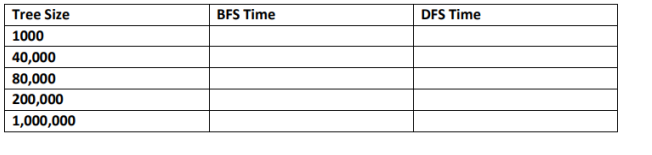

5. Finally plot the bar chart of the time taken by each search for example (on X-axis the data will
be 1000,40,000,80,000,200,000 and 1,000,000.) and on the Y axis the data will be the seconds it
took while searching

Results:
   Total Size  BFS Time  DFS Time
0        1000  0.000018  0.000011
1       40000  0.001976  0.000835
2       80000  0.005013  0.002763
3      200000  0.014501  0.013166
4     1000000  0.076556  0.074635


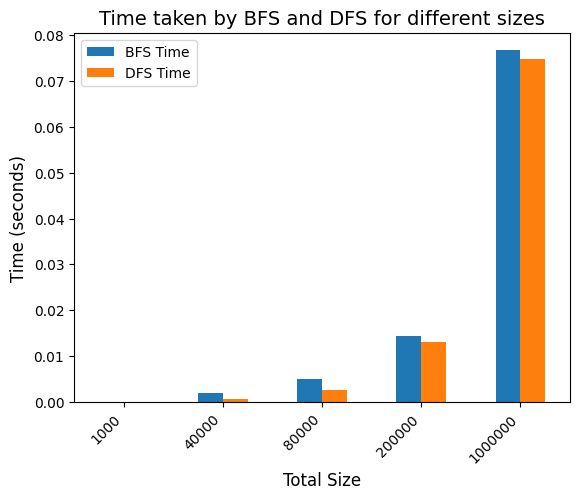

In [ ]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

def generate_random_numbers(size):
    """Generate unique random numbers for each set."""
    return random.sample(range(1, size + 1), size)

def build_tree(numbers):
    """Build a tree from a list of numbers."""
    return {num: {'left': None, 'right': None} for num in numbers}

def bfs(tree, goal):
    """Perform Breadth First Search."""
    start_time = time.time()
    queue = deque([list(tree.keys())[0]])  # Start from the root node
    while queue:
        node = queue.popleft()
        if node == goal:
            return time.time() - start_time
        left_child = tree[node]['left']
        right_child = tree[node]['right']
        if left_child:
            queue.append(left_child)
        if right_child:
            queue.append(right_child)
    return time.time() - start_time  # Return time taken even if goal not found

def dfs(tree, goal):
    """Perform Depth First Search."""
    start_time = time.time()
    stack = [list(tree.keys())[0]]  # Start from the root node
    while stack:
        node = stack.pop()
        if node == goal:
            return time.time() - start_time
        left_child = tree[node]['left']
        right_child = tree[node]['right']
        if right_child:
            stack.append(right_child)
        if left_child:
            stack.append(left_child)
    return time.time() - start_time  # Return time taken even if goal not found

def main():
    sizes = [1000, 40000, 80000, 200000, 1000000]
    results = {'Total Size': sizes, 'BFS Time': [], 'DFS Time': []}

    for size in sizes:
        numbers = generate_random_numbers(size)
        tree = build_tree(numbers)
        goal = numbers[-220]
        bfs_time = bfs(tree, goal)
        dfs_time = dfs(tree, goal)
        results['BFS Time'].append(bfs_time)
        results['DFS Time'].append(dfs_time)

    df = pd.DataFrame(results)

    # Print the DataFrame
    print("Results:")
    print(df)

    # Plotting the bar chart
    ax = df.plot(x='Total Size', kind='bar')
    ax.set_ylabel('Time (seconds)', fontsize=12)
    ax.set_xlabel('Total Size', fontsize=12)
    ax.set_title('Time taken by BFS and DFS for different sizes', fontsize=14)
    ax.set_xticklabels(df['Total Size'], rotation=45, ha='right')
    plt.show()

if __name__ == "__main__":
    main()


# **Task 3 :**
Consider a maze as shown below. Each empty tile represents a separate node in the graph, while
the walls are represented by blue tiles. Your starting node is A, and the goal is to reach Y. Implement
an A* search to find the resulting path.

In [2]:
def manhattan_distance(pt1, pt2):
    x1, y1 = pt1
    x2, y2 = pt2
    return abs(x1 - x2) + abs(y1 - y2)

def a_star_search(maze, start, goal):
    rows, cols = len(maze), len(maze[0])

    # Initialize scores and parent pointers for all nodes
    g_score = {(x, y): float('inf') for x in range(rows) for y in range(cols)}
    g_score[start] = 0
    f_score = {(x, y): float('inf') for x in range(rows) for y in range(cols)}
    f_score[start] = manhattan_distance(start, goal)
    parent = {(x, y): None for x in range(rows) for y in range(cols)}

    # Priority queue for open list
    open_list = [(f_score[start], start)]

    # Closed list to store explored nodes
    closed_list = set()

    while open_list:
        # Get the node with the lowest f_score
        current_f_score, current_node = min(open_list)

        # If goal is reached, reconstruct path
        if current_node == goal:
            path = []
            while current_node:
                path.append(current_node)
                current_node = parent[current_node]
            return path[::-1]  # Reverse for start to goal order

        open_list.remove((current_f_score, current_node))
        closed_list.add(current_node)

        # Explore neighbors
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            x, y = current_node[0] + dx, current_node[1] + dy
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] != 'W':  # Check if valid neighbor
                neighbor = (x, y)
                tentative_g_score = g_score[current_node] + 1  # Assuming uniform movement cost

                # If neighbor not yet explored or has better path through current node
                if neighbor not in closed_list and tentative_g_score < g_score.get(neighbor, float('inf')):
                    parent[neighbor] = current_node
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + manhattan_distance(neighbor, goal)
                    open_list.append((f_score[neighbor], neighbor))

    return None  # No path found

# Example maze (replace with your actual maze layout)
maze = [
    [' ', ' ', 'W', ' ', 'X', 'Y'],  # Green represents Start (A) and Goal (Y)
    ['R', 'S', 'T', 'U', ' ', 'V'],
    ['M', 'N', ' ', 'O', 'P', 'Q'],
    ['H', 'I', 'J', ' ', 'K', 'L'],
    ['F', ' ', 'G', ' ', ' ', ' '],
    ['A', ' ', 'B', 'C', 'D', 'E'],
]

start = (0, 0)  # Replace with your actual start position (A)
goal = (5, 5)   # Replace with your actual goal position (Y)

path = a_star_search(maze, start, goal)

if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]


## **Task 4:**
**Implement Alpha-Beta Pruning using python.**


In [3]:
import math as m

# Represents a node in the game tree
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.children = []

# Alpha-Beta Pruning algorithm
def alpha_beta_pruning(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or len(node.children) == 0:
        return node.val

    if maximizing_player:
        max_val = -m.inf
        for child in node.children:
            val = alpha_beta_pruning(child, depth - 1, alpha, beta, False)
            max_val = max(max_val, val)
            alpha = max(alpha, max_val)
            if beta <= alpha:
                break
        return max_val
    else:
        min_val = m.inf
        for child in node.children:
            val = alpha_beta_pruning(child, depth - 1, alpha, beta, True)
            min_val = min(min_val, val)
            beta = min(beta, min_val)
            if beta <= alpha:
                break
        return min_val

# Example usage
root = TreeNode(0)
root.children = [TreeNode(3), TreeNode(6), TreeNode(5)]
root.children[0].children = [TreeNode(9), TreeNode(12), TreeNode(8)]
root.children[1].children = [TreeNode(5), TreeNode(7), TreeNode(4)]
root.children[2].children = [TreeNode(1), TreeNode(10), TreeNode(2)]

alpha_value = -m.inf
beta_value = m.inf
depth_value = 3
maximizing_player_flag = True

optimal_val = alpha_beta_pruning(root, depth_value, alpha_value, beta_value, maximizing_player_flag)
print("Optimal value:", optimal_val)


Optimal value: 8
